### 목표 : 미니배치기반 기계학습 진행 실습
- 확률적경사하강법 기반의 알고리즘 적용 모델
- 데이터의 처음부터 끝까지(에포크) 학습 후 가중치(w)와 절편(b) 엄데이트 하는 방식에서 에포크를 미니배치 크기만큼 나누어서 학습 후 가중치(w)와 절편(b) 업데이트 진행함
- 장점
    * 온라인 학습 즉 점진적 학습이 가능 => partial_fit() : 기존 모델에 추가로 1에포크 학습
    * 기존의 다른 모델보다 속도 빠름 => 랜덤으로 한개 데이터 추출 후 학습 진행
    * 조기 학습 중단 설정 가능
- 단점
    * 전체 학습보다 정확도는 떨어질 수 있음!

[1] 모듈 로딩 및 데이터 준비<hr>

In [1]:
# 모듈 로딩
import pandas as pd

data = '../data/fish.csv'

In [3]:
# 데이터 로딩
fishDF = pd.read_csv(data)
fishDF.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


[2] 데이터 전처리 => 학습을 위한 가공<hr>

[2-1] 피쳐 / 타겟 분리

In [7]:
targetSR = fishDF[fishDF.columns[0]]
featurerDF = fishDF[fishDF.columns[1:]]
featurerDF.shape, targetSR.shape

((159, 5), (159,))

[2-2] 학습/테스트 용 데이터 셋 분리<hr>

In [60]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(featurerDF,targetSR,random_state=41,stratify=targetSR)

In [61]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((119, 5), (119,), (40, 5), (40,))

[2-3] 피쳐 스케일링<hr>

In [62]:
from sklearn.preprocessing import StandardScaler

# 스케일러 생성
scaler = StandardScaler()
scaler.fit(xtrain)
# 훈련용 데이터셋 스케일링
xtrain = scaler.transform(xtrain)
# 테스트용 데이터셋 스케일링
xtest = scaler.transform(xtest)

[3] 학습 진행 <hr>
- 학습 방법 : 확률적 경사 하강법(SGD)기반의 분류

In [114]:
# 모델 인스턴스 생성
from sklearn.linear_model import SGDClassifier
model1 = SGDClassifier(random_state=41, verbose=0, loss = 'log_loss', n_iter_no_change=66) # verbose : 학습단계를 보이게 설정
# n_iter_no_change = max_iter : 1000번 다 돌고 학습 종료 -> 성능이 올라감
# 최적의 학습 횟수를 찾아야함
model1.fit(xtrain,ytrain)
model1.score(xtrain,ytrain),model1.score(xtest,ytest)

(0.9411764705882353, 0.95)

In [107]:
# 학습 후 설정된 파라미터 즉 모델 파라미터 확인
model1.n_iter_  # 34번만에 확습 완료

196

- 1에포크씩 점진적으로 학습 진행 => partial_fit()

In [135]:
# 모델 인스턴스 생성
model2 = SGDClassifier(random_state=41, loss = 'log_loss', alpha=0.01)
# 과대적합일 때, alpha값 찾아서 강도 조절을 통해 해결해야함
# 규제를 강하게 하겠다 -> 가중치의 값을 작게 하겠다 -> 회귀곡선을 구불구불하지 않고 대충 비스듬하게 만들겠다

model2.partial_fit(xtrain,ytrain,ytrain.unique()) # 클래스 값 넣어줘야함 -> ytrain.unique()하면 클래스 고유의 값 반환됨
model2.score(xtrain,ytrain),model2.score(xtest,ytest)

(0.680672268907563, 0.625)

In [132]:
trainList = []
testList = []

for n in range(100):
    model2.partial_fit(xtrain,ytrain,ytrain.unique())
    trainscore = model2.score(xtrain,ytrain)
    testscore = model2.score(xtest,ytest)
    print(f'[{n+1}번 학습] {trainscore,testscore}')
    trainList.append(trainscore)
    testList.append(testscore)
# test score 가지고 n_iter_no_change 파라미터 값 설정
    if (testscore>=0.90) and(abs(testscore - trainscore) >= 0.03) : # testscore가 0.90보다 크거나 같고, testscore와 trainscore의 차가 0.03 이하면 멈출래
        break

[1번 학습] (0.9243697478991597, 0.9)
[2번 학습] (0.9243697478991597, 0.9)
[3번 학습] (0.9243697478991597, 0.9)
[4번 학습] (0.9243697478991597, 0.9)
[5번 학습] (0.9243697478991597, 0.9)
[6번 학습] (0.9243697478991597, 0.9)
[7번 학습] (0.9243697478991597, 0.9)
[8번 학습] (0.9243697478991597, 0.9)
[9번 학습] (0.9243697478991597, 0.9)
[10번 학습] (0.9243697478991597, 0.9)
[11번 학습] (0.9243697478991597, 0.9)
[12번 학습] (0.9243697478991597, 0.9)
[13번 학습] (0.9243697478991597, 0.9)
[14번 학습] (0.9243697478991597, 0.9)
[15번 학습] (0.9243697478991597, 0.9)
[16번 학습] (0.9327731092436975, 0.9)


Text(0.5, 1.0, '[Train-Test]')

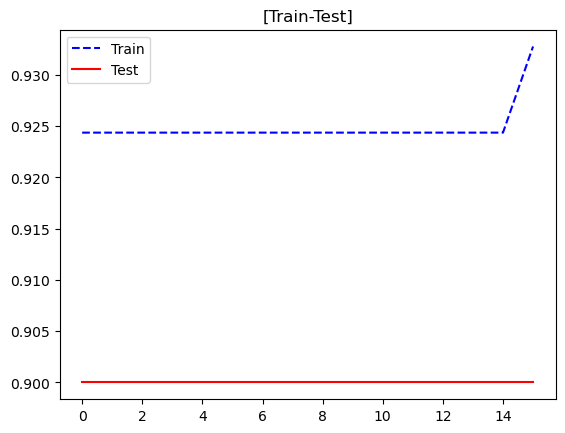

In [133]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(trainList,'b--', label = 'Train')
plt.plot(testList,'r-',label = 'Test')
plt.legend()
plt.title('[Train-Test]')